## スクラッチによるサポートベクターマシンの実装

### 【問題1】SVM分類器のクラスを作成する

scikit-learnの実装はソフトマージンSVMになっています。
<br>ハードマージンSVMを再現するには、パラメータCをC=1e10のように非常に大きな値を設定します。
<br>（無限大に向けてCを大きくするほどハードマージンSVMに近づきます）
<br>
<br>また、線形カーネルをscikit-learnで使う場合はkernel="linear"と指定します。
<br>デフォルトではkernel="rbf"になっており、多項式カーネルと呼ばれるものになっています。

In [1]:
import numpy as np
import math
from sklearn.metrics import accuracy_score
import copy 
import matplotlib.pyplot as plt
%matplotlib inline

class ScratchSVMClassifier():
    """
    SVM分類のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    lambda : float
      正則化パラメーター

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,1)
      パラメータ
    """

    def __init__(self, num_iter=10000, lr=0.000000005, threshold=0.1**5):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.lam = 0
        self.lam_X = 0
        self.lam_y = 0
        self.theta = 0
        self.threshold = threshold
    
    def fit(self, X, y):
        
        #ラベル０をマイナス１に変換
        y[y==0] = -1 
        #リシェイプ
        y = y.reshape(len(y), 1)
        #ラムダの更新
        self._compute_lambda(X, y)
        
    def predict(self, X):
        pred = np.dot(self._kernel_linear(X, self.lam_X.T), self.lam * self.lam_y)
        print(pred)
        pred = (pred >= 0).astype(int)
        return pred
    
    def _compute_lambda(self, X, y):
        # lambdaの初期化
        #lam = np.random.rand(len(X), 1)
        lam = np.ones(len(X)).reshape(len(X), 1)
        lam = lam *-10 
        
        for num in range(self.iter):
            lam = lam + self.lr * (1 - np.dot(np.dot(y, y.T) * self._kernel_linear(X, X.T), lam))
            lam = np.where(lam < 0, 0, lam)  
            
            if sum((lam > self.threshold).astype(int)) >= 2:
                print("ラムダ更新回数")
                print(num)
                break
        
        #閾値以上のサポートベクトルを抜き出す
        self.lam = lam[np.any(lam > self.threshold, axis=1), :]
        self.lam_X = X[np.any(lam > self.threshold, axis=1), :]
        self.lam_y = y[np.any(lam > self.threshold, axis=1), :]
        #thetaの計算n*1のベクトル
        self.theta = np.dot(self.lam_X.T, self.lam * self.lam_y)
        if len(self.lam) == 0:
            print("Error：can not find any support vectors")
        
    def _kernel_linear(self, x1, x2):
        
        return np.dot(x1, x2)

    def accuracy(self, y_test, y_pred):
        #accuracyを計算して返す
        return accuracy_score(y_test, y_pred)

In [2]:
#シンプルデータセット１
from sklearn.model_selection import train_test_split

np.random.seed(seed=0)
n_samples = 500
f0= [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

y = np.where(y == -1, 0, y)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [3]:
model = ScratchSVMClassifier()

### 【問題5】時間の計測

In [4]:
%time
model.fit(X_train, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs
ラムダ更新回数
2003


In [19]:
model.lam_X

(14, 2)

In [6]:
model.lam_X.shape

(14, 2)

In [7]:
y_pred = model.predict(X_test)
y_pred.shape

[[-1.33988844e-04]
 [-1.05232510e-04]
 [-9.92622142e-05]
 [ 1.02763111e-04]
 [-9.11918696e-05]
 [ 1.08617342e-04]
 [ 1.01161037e-04]
 [-5.88487052e-05]
 [ 1.39238081e-04]
 [ 1.33047252e-04]
 [-7.47115894e-05]
 [ 9.80315720e-05]
 [ 8.18235527e-05]
 [ 8.59709139e-05]
 [-1.36011819e-04]
 [ 1.35146656e-04]
 [-8.81025000e-05]
 [ 1.01821740e-04]
 [ 7.52338601e-05]
 [ 9.88734120e-05]
 [ 9.13093151e-05]
 [-1.05530952e-04]
 [ 1.11987771e-04]
 [ 1.32710872e-04]
 [-8.47317270e-05]
 [-9.64148413e-05]
 [-9.29354150e-05]
 [-7.35270610e-05]
 [ 1.19206423e-04]
 [ 1.04477318e-04]
 [-1.03101089e-04]
 [-1.21450495e-04]
 [-8.64818390e-05]
 [ 1.04873742e-04]
 [ 5.23684706e-05]
 [ 8.55536099e-05]
 [-1.20750141e-04]
 [ 8.25497853e-05]
 [ 1.11291891e-04]
 [-9.18357080e-05]
 [ 9.35212370e-05]
 [ 1.25639996e-04]
 [ 6.69342015e-05]
 [ 1.55981588e-04]
 [ 9.23602932e-05]
 [-1.35160822e-04]
 [ 1.10012656e-04]
 [ 1.28204322e-04]
 [ 1.46206971e-04]
 [ 9.13300451e-05]
 [ 1.28365860e-04]
 [-9.60913480e-05]
 [-1.1975700

(150, 1)

## 検証

### 【問題3】指標値の算出

In [8]:
#accuracyの算出
model.accuracy(y_test, y_pred)

1.0

### 【問題4】決定領域の可視化

In [9]:
np.sort(model.lam)[::-1][:3,:] #トップ３

array([[1.00048209e-05],
       [1.00002225e-05],
       [1.00016328e-05]])

In [10]:
top3 = np.hstack((model.lam, model.lam_X))
top3 = np.sort(top3)[::-1][:,:]

In [14]:
top3

array([[-6.35944665e-01,  1.00048209e-05,  5.59763850e-02],
       [-9.48087001e-02,  1.00002225e-05,  9.20694902e-01],
       [-6.16207395e-01,  1.00016328e-05,  2.95335547e-01],
       [-5.61579724e-02,  1.00005064e-05,  9.28731590e-01],
       [-8.58001751e-01, -1.18576563e-01,  1.00042762e-05],
       [-8.85561812e-01, -1.76086622e-01,  1.00047226e-05],
       [-1.29276452e+00, -3.50101054e-01,  1.00013671e-05],
       [-4.28807723e-01,  1.00029584e-05,  3.94012999e-01],
       [-5.93842524e-01,  1.00048004e-05,  1.06522625e-01],
       [ 1.00012210e-05,  2.38473299e-01,  1.18971056e+00],
       [-6.50113401e-01,  1.00020997e-05,  2.28853142e-01],
       [-4.78969002e-01,  1.00027331e-05,  3.58692007e-01],
       [-1.00703748e+00, -9.27423794e-02,  1.00015173e-05],
       [-1.41995351e-01,  1.00017968e-05,  7.56398677e-01]])

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['X_label_1', 'X_label_2']):
    """
    Draw the decision area of the model learned by binary classification with two dimensional 
    feature quantity.
     The color of the background is drawn from the estimated value by the learned model.
     The point of the scatter diagram is learning data.

     Parameters
     ------------------
     X_train: ndarray, shape (n_samples, 2)
         Characteristic quantity of learning data
     y_train: ndarray, shape (n_samples,)
         Correct value of learning data
     model: object
         **** Insert Instantus of the learned model
     step: float, (default: 0.1)
         Set interval to calculate estimated value
     title: str
         Give the text of the title of the graph
     xlabel, ylabel: str
         Give sentences of axis labels
     target_names =: list of str
         Give a list of legends
    """
    # define Initial setting 
    fig, ax = plt.subplots(figsize=(6, 6))
    fig.patch.set_facecolor('skyblue')
    fig.patch.set_alpha(1)
    ax.patch.set_facecolor('white')
    ax.patch.set_alpha(1)
    # ax.set_yscale('log') 
    plt.grid()
    
    # setting
    scatter_color = ['red', 'green']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot setting title
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='g', linewidths=5, alpha=0.5)
    
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=150, color=scatter_color[i], label=target_names[i], 
                    marker='x', alpha=0.7)
    plt.scatter(model.lam_X[:, 0], model.lam_X[:, 1], c='gold')
        
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

[[ 5.27090619e-05]
 [ 5.19909997e-05]
 [ 5.12729376e-05]
 ...
 [-6.95969629e-05]
 [-7.03150251e-05]
 [-7.10330873e-05]]


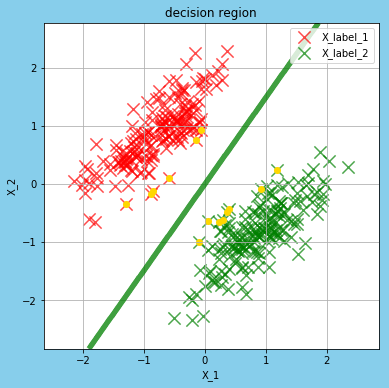

In [23]:
decision_region(X_train, y_train, model, xlabel='X_1', ylabel="X_2")

## ディスカッション

### 【問題6】ロジスティック回帰とSVM
最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。
<br>ロジスティック回帰とSVMは本質的に何が異なっているか
<br>注意点: 答えがある問いではありません。いろいろな視点から見て理解を深めていきましょう。

・ロジスティック回帰は、分類しかできないが、SVMは分類問題も回帰問題も解くことができる。
<br>・ロジスティック回帰は確率を出しているが、SVMは確率ではない何かを出している。